#  数据预处理基础

## 一、数据文件读取
    数据形式：特征1   特征2   特征3  ...   类别(目标变量)---->矩阵,类别向量
### 1、python原生方式读取
 fr = open(filename),然后逐行读取，费时，效率低。
### 2、利用numpy读取
loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False,
           ndmin=0, encoding='bytes')
### 3、利用panda读取
read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame

### 案例1：python原生方式读取文件

In [1]:
from numpy import *
import operator
from os import listdir
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

datingDataMat,datingLabels=file2matrix('Ch02/datingTestSet2.txt')

### 案例2：numpy读取txt文件

In [2]:
import numpy as np
a=np.loadtxt('Ch02/datingTestSet2.txt',delimiter="\t")
datingDataMat=a[:,:3]
datingLabels=a[:,-1]

### 案例3：pandas读取csv文件

In [3]:
import pandas as pd
data = pd.read_csv('Ch02/datingTestSet2.txt',delimiter="\t")

## 二、数据归一化
     数据归一化（标准化）处理是数据挖掘的一项基础工作，不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。
### 1）min-max标准化
min-max标准化也叫做离差标准化，是对原始数据的线性变换，使结果落到[0,1]区间，其对应的数学公式如下：
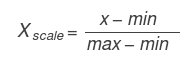
也可以使结果落到[-1,1]区间，对应数学公式如下：
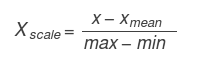
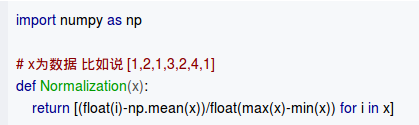
#### 缺点如下：
     (1)当有新数据加入时，可能导致max和min的变化，需要重新定义。
     (2)如果数据中有一些偏离正常数据的异常点，就会导致标准化结果的不准确性。比如说一个公司员工（A，B，C，D）的薪水为6k,8k,7k,10w,这种情况下进行归一化对每个员工来讲都是不合理的。
### 2）z-score标准化
z-score标准化也叫标准差标准化，代表的是分值偏离均值的程度，经过处理的数据符合标准正态分布，即均值为0，标准差为1。其转化函数为
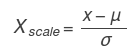其中μ为所有样本数据的均值，σ为所有样本数据的标准差。
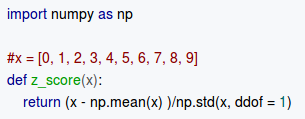
### 3）改进的z-score标准化
将标准分公式中的均值改为中位数，将标准差改为绝对偏差。
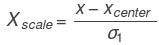中位数是指将所有数据进行排序，取中间的那个值，如数据量是偶数，则取中间两个数据的平均值。σ1为所有样本数据的绝对偏差,其计算公式为：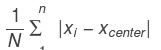
## sklearn包中的归一化处理：
*   1) X_scaled = preprocessing.scale(X_train)  ---->z-score处理方法
*   2) min_max_scaler = preprocessing.MinMaxScaler()
*     X_train_minmax = min_max_scaler.fit_transform(X_train)

### sklearn归一化例子

In [4]:
from sklearn import preprocessing
X= preprocessing.scale(datingDataMat)#Z-score标准化
print(X)
min_max_scaler = preprocessing.MinMaxScaler()#min-max归一化
X1= min_max_scaler.fit_transform(datingDataMat)
print(X1)

[[ 0.33193158  0.41660188  0.24523407]
 [-0.87247784  0.13992897  1.69385734]
 [-0.34554872 -1.20667094 -0.05422437]
 ...
 [-0.32171752  0.96431572  0.06952649]
 [ 0.65959911  0.60699509 -0.20931587]
 [ 0.46120328  0.31183342  1.00680598]]
[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### 书上归一化方案

In [5]:
import numpy as np
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet/np.tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals
nDS,r,m=autoNorm(datingDataMat)
print(nDS)
print(r)
print(m)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


## 三、数据观察--散点图绘制
### 1、matplotlib.pyplot.scatter()函数说明
#### scatter:
    * 参数：x,y数组array,分别代样本点的x，y轴坐标值序列。
            * c：代表每个样本点颜色序列,这个颜色序列映射到cmap参数指定的颜色空间，关于cmap和c的映射实例参见CMAP背景知识。
            * s：每个样本点的大小，样本点在散点图中的大小可以不一样，该参数可以是一个序列数组指定每个点的大小，也可以用数字指定所有点大小。
            * marker：样本点的样式，“<”左三角，">"右三角，"o"圆圈，“.”像素点，“*”星星,....
            * cmap: 指定样本的颜色空间。cmap是colormap指定的颜色空间。
            * norm: 是否标准化，归一化
            * vmin,vmax:标准化时指定最大值、最小值
            * alpha：设置点的透明度。
            * linewidths：线宽
            * verts:
            * edgecolors
#### make_blobs:
    * 参数：n_samples样本数量；n_features类型数量；Shuffle是否重新洗牌；centers：分布中心数量；cluster_std标准差；random_state随机种子；
    * 返回值：X :生成的样本点坐标；y : 每个样本点的类型
### 2、颜色空间映射：
* 使用 matplotlib 或者 matlab ，在绘图的时候，经常会看到这个参数。那么这个参数到底是啥呢？
* 图片中每个样本点都需要特别指定颜色，这个设置起来挺麻烦的，所以引入了“颜色空间”这个概念，python根据每个像素点的具体取值，映射到颜色空间中自动得到颜色。如下图：
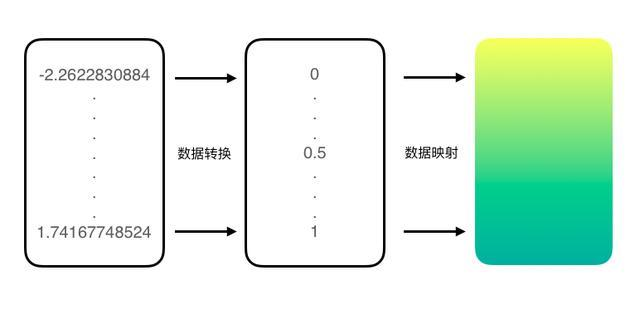
* color map 实际上就是一个 三列的矩阵(或者说，shape 为 [N, 3]的 array )
* 矩阵中的值 取值范围 为 [0.,1.]  每一行代表颜色空间中一个颜色 (RGB)
* colormap通过两个步骤实现：(scatter函数将这个过程隐藏到了函数体内部)
    * 通过数据转换类Normalize或者子类的实例将包含数据的数组转换成区间[0，1]内的数字索引。
    * 通过颜色映射类Colormap或子类的实例将区间[0，1]内的数字索引映射成颜色。
     ### 内置颜色空间
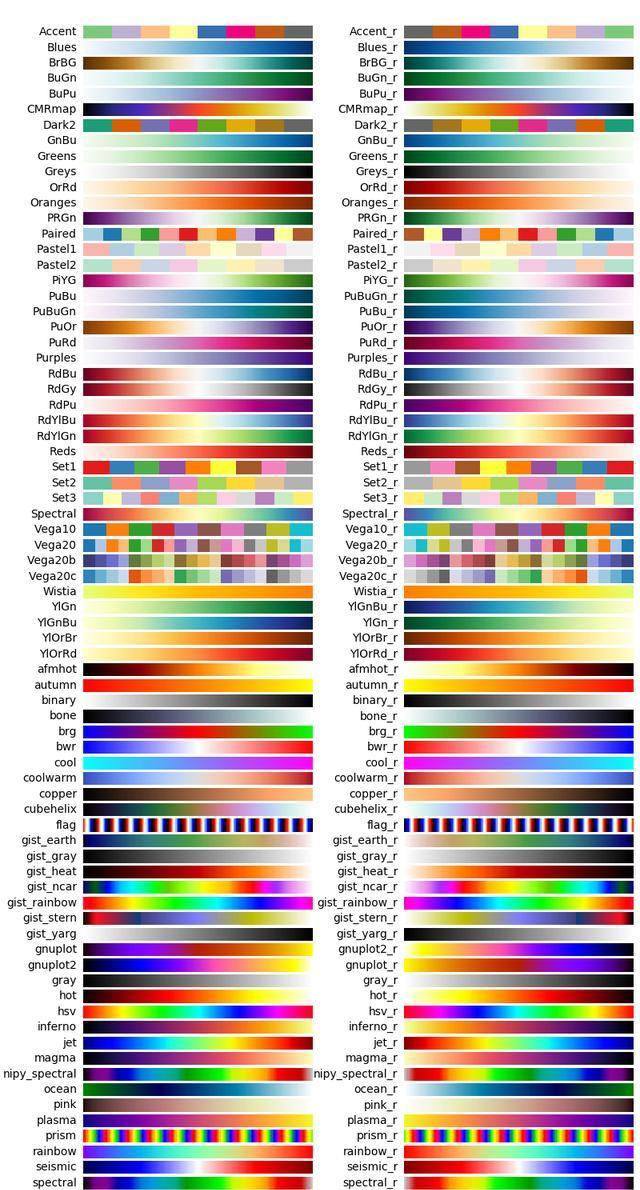
    * 查看内置颜色空间
        * from matplotlib.cm import cmap_d
        *  cmap_d
* 关注文章：
* https://baijiahao.baidu.com/s?id=1586204282276603109&wfr=spider&for=pc
* https://baijiahao.baidu.com/s?id=1588091457781111023&wfr=spider&for=pc
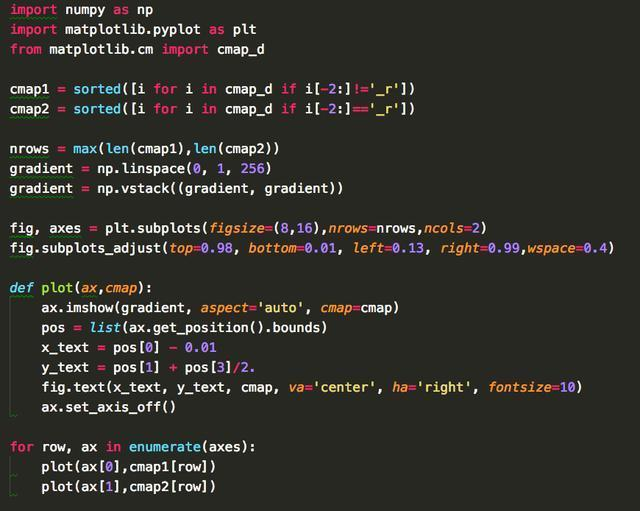

### 散点图实例代码

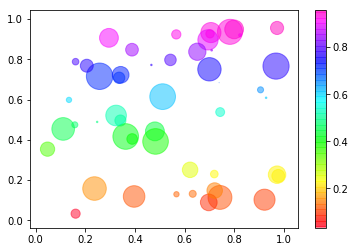

In [6]:
%matplotlib inline 
#为了在notebook中画图展示
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
np.random.seed(19680801)
N=50
x=np.random.rand(N)
y=np.random.rand(N)
c=np.random.rand(N)
area=np.pi*(15*np.random.rand(N))**2
plt.scatter(x,y,s=area,c=y,alpha=0.5,cmap='gist_rainbow')
plt.colorbar()
plt.show()

###  书上散点图案例

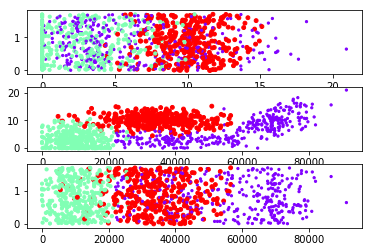

In [7]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
fig=plt.figure()
ax=fig.add_subplot(311)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],5*array(datingLabels),5*array(datingLabels),cmap='rainbow')
ax1=fig.add_subplot(312)
ax1.scatter(datingDataMat[:,0],datingDataMat[:,1],5*array(datingLabels),5*array(datingLabels),cmap='rainbow')
ax2=fig.add_subplot(313)
ax2.scatter(datingDataMat[:,0],datingDataMat[:,2],5*array(datingLabels),5*array(datingLabels),cmap='rainbow')
plt.show()

### 3D散点图案例

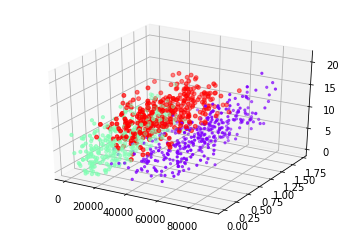

In [8]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D#必须增加这个包，才能显示3D图
%matplotlib inline 
fig=plt.figure()
ax3=fig.add_subplot(111,projection='3d')
ax3.scatter(datingDataMat[:,0],datingDataMat[:,2],datingDataMat[:,1],s=5*array(datingLabels),c=5*array(datingLabels),cmap='rainbow')
plt.show()

### 使用seaborn和panda包快速显示特征变量关系
* 参考https://yq.aliyun.com/articles/581263?utm_content=m_1000011262

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWar

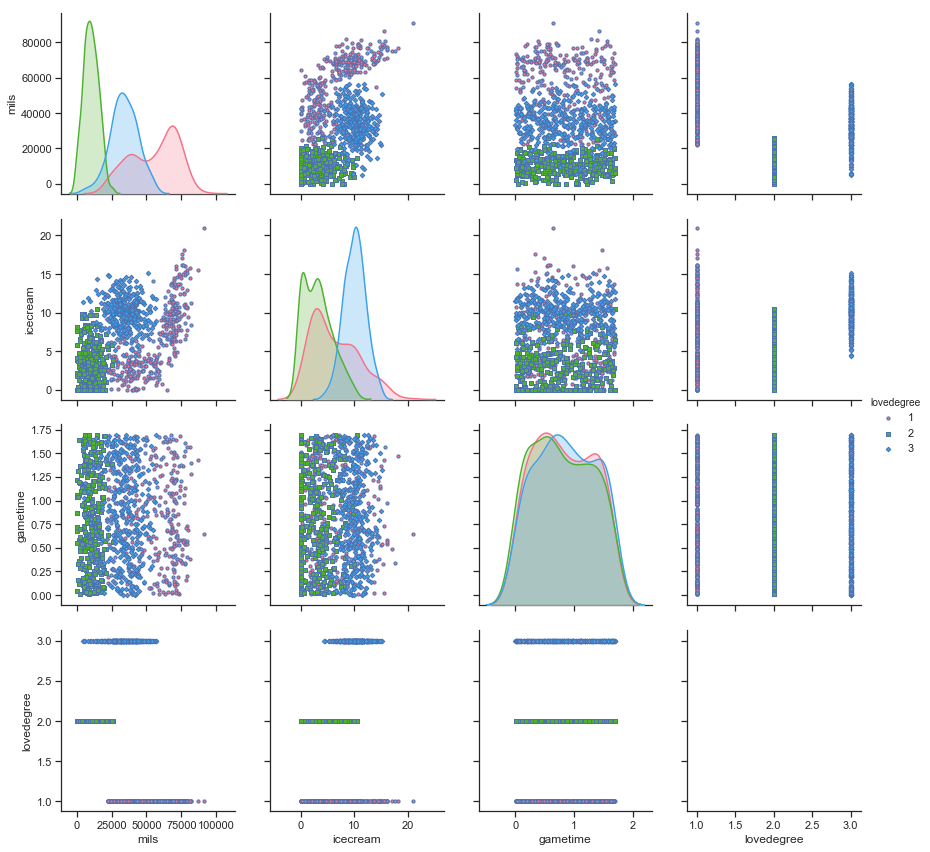

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('Ch02/datingTestSet3.txt',delimiter="\t")
sns.set(style="ticks", color_codes=True)
g2 = sns.pairplot(data, hue="lovedegree",size=3,palette="husl",diag_kind="kde",markers=["o", "s", "D"], plot_kws=dict(s=10, edgecolor="b", linewidth=1), diag_kws=None, grid_kws=None)


## 四、样本集合的划分

### 1、训练集、验证集、测试集：
#### 训练集（Training set）
     作用是用来拟合模型，通过设置分类器的参数，训练分类模型。后续结合验证集作用时，会选出同一参数的不同取值，拟合出多个分类器。
#### 验证集(Cross Validation set)
    作用是当通过训练集训练出多个模型后，为了能找出效果最佳的模型，使用各个模型对验证集数据进行预测，并记录模型准确率。选出效果最佳的模型所对应的参数，即用来调整模型参数。如svm中的参数c和核函数等。
#### 测试集(Test set)
    通过训练集和验证集得出最优模型后，使用测试集进行模型预测。用来衡量该最优模型的性能和分类能力。即可以把测试集当做从来不存在的数据集，当已经确定模型参数后，使用测试集进行模型性能评价。

### 2、划分方法
#### 方法1：留出法
    直接将数据集D划分为三个互斥的集合。一个作为训练集，一个作为验证集，另一个作为测试集；一般比例：6:2:2
   ###### 需要注意的问题
    * 在划分的时候应该尽量保持数据分布的一致性。例如在分类任务中应该保持正负样本比例相近。
    * 划分存在多种方法，为得到合理的算法模型评估标准，应该进行多次数据集的划分。得到每次划分的数据集上的评估结果，取平均值作为评判模型优劣的标准。
    * 训练集不能太大：训练集太大会导致测试集偏小，评估的结果可能不太准确稳定。
    * 测试集不能太大：测试集太大会导致训练集偏小，训练出来的模型可能会完整数据集所需要的模型产生较大的偏差。
   ##### 缺点：
    * 缺点一:浪费数据
    * 缺点二:容易过拟合,且矫正方式不方便
#### 方法2：交叉验证法
    将数据集D划分为k个大小相似的互斥子集，即D=D1∪D2∪…∪Dk，Di ∩ Dj = 空集（i ≠j） 每个子集Di都尽可能保持数据分布的一致性，即从D中通过分层采样得到。然后，每次用k-1个子集的并集作为训练集，余下的那个子集作为测试集；这样就可获得k组训练/测试集，从而可进行k次训练和测试，最终返回的是这k个测试结果的均值。
#### 方法3：自助法
    给定包含m个样本的数据集D:每次从D中挑选一个样本，将其放入D'，然后再将该样本放回初始数据集D中；这个过程重复执行m次后，我们就得到了包含m个样本的数据集D'.-----》针对样本数量不足时的方法

### 留出法案例

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

X= preprocessing.scale(datingDataMat)
X_train, X_test, Y_train, Y_test = train_test_split(X, datingLabels, test_size=0.30, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(X))

700
300
1000


### 交叉验证案例---KFold

In [18]:
import numpy as np
#KFold
from sklearn.model_selection import KFold
X=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
y=np.array([1,2,3,4,5,6])
kf=KFold(n_splits=3)    #分成几个组
kf.get_n_splits(X,y)
print(kf)
print(kf.get_n_splits(X,y))
for train_index,test_index in kf.split(X):
    print("Train Index:",train_index,",Test Index:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    print(X_train,X_test,y_train,y_test)
#KFold(n_splits=2, random_state=None, shuffle=False) #Train Index: [3 4 5] ,Test Index: [0 1 2] #Train Index: [0 1 2] ,Test Index: [3 4 5]


KFold(n_splits=3, random_state=None, shuffle=False)
3
Train Index: [2 3 4 5] ,Test Index: [0 1]
[[ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]] [[1 2]
 [3 4]] [3 4 5 6] [1 2]
Train Index: [0 1 4 5] ,Test Index: [2 3]
[[ 1  2]
 [ 3  4]
 [ 9 10]
 [11 12]] [[5 6]
 [7 8]] [1 2 5 6] [3 4]
Train Index: [0 1 2 3] ,Test Index: [4 5]
[[1 2]
 [3 4]
 [5 6]
 [7 8]] [[ 9 10]
 [11 12]] [1 2 3 4] [5 6]


### 交叉验证案例---GroupKFold

In [21]:
import numpy as np
from sklearn.model_selection import GroupKFold
X=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
y=np.array([1,2,3,4,5,6])
groups=np.array([1,2,3,4,5,6])
group_kfold=GroupKFold(n_splits=3)
group_kfold.get_n_splits(X,y,groups)
print(group_kfold)
print(group_kfold.get_n_splits(X,y,groups))
for train_index,test_index in group_kfold.split(X,y,groups):
    print("Train Index:",train_index,",Test Index:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    #print(X_train,X_test,y_train,y_test)

GroupKFold(n_splits=3)
3
Train Index: [0 1 3 4] ,Test Index: [2 5]
Train Index: [0 2 3 5] ,Test Index: [1 4]
Train Index: [1 2 4 5] ,Test Index: [0 3]


### 书上KNN案例数据 留出法 划分

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

X= preprocessing.scale(datingDataMat)
#X= datingDataMat
X_train, X_test, Y_train, Y_test = train_test_split(X, datingLabels, test_size=0.30, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(X))
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
iris_y_predict = knn.predict(X_test) 
score=knn.score(X_test,Y_test,sample_weight=None)
score

700
300
1000


0.9266666666666666

### 书上KNN案例数据  交叉验证KFlod 划分----cross_val_score方法

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(clf,X, datingLabels, cv=10)
print(scores)                                                #预测准确率：array([ 1 ,0.93333333 ,1 ,1 ,  0.86666667 ,1,0.93333333 ,1 ,1 ,1])
print("Accurary:%0.2f"%scores.mean())                 #平均预测准确率：Accurary:0.97

[0.95098039 0.9009901  0.93       0.95       0.97       0.97
 0.93       1.         0.96969697 0.92929293]
Accurary:0.95


### 书上KNN案例数据  交叉验证KFlod 划分----KFlod方法

In [15]:
import numpy as np
#KFold
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
dat=np.array(datingDataMat)
labels=np.array(datingLabels)
X= preprocessing.scale(dat)
y=labels
kf=KFold(n_splits=10)    #分成几个组
kf.get_n_splits(X,y)
scores=[]
for train_index,test_index in kf.split(X):
    knn=KNeighborsClassifier()
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]    
    knn.fit(X_train,y_train)
    iris_y_predict = knn.predict(X_test) 
    score=knn.score(X_test,y_test,sample_weight=None)
    scores.append(score)
print(scores)
print(np.array(scores).mean())


[0.96, 0.91, 0.95, 0.95, 0.94, 0.95, 0.96, 1.0, 0.97, 0.92]
0.951


#### 小提示：
*  numpy中的ndarray和list不同，ndarray是一整块连续内存，存放相同数据类型的数据，以便增加运算速度。python语言中list是链表形式的数据类型，所以其内存可以动态扩展，但是速度不够快。
*  所以，ndarray一般很少这么用：先建立一个空的ndarray，然后增加元素到ndarray中。一般一开始就会把需要用的空间分配好给ndarray。而list是可以先建立一个空列表，然后新增一些元素进去。上面例子scores=[]，等于是新建了list，然后scores.append用于新增元素